In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [24]:
df = pd.read_csv('cell_samples.csv')

In [25]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [26]:
df = df.drop(['ID'], axis=1)

In [27]:
#converting types of the data ie object to int
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()] # Converts invalid values to NaN
df['BareNuc'] = df['BareNuc'].astype('int')

In [28]:
df.columns

Index(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
       'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [29]:
df.describe()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Clump        683 non-null    int64
 1   UnifSize     683 non-null    int64
 2   UnifShape    683 non-null    int64
 3   MargAdh      683 non-null    int64
 4   SingEpiSize  683 non-null    int64
 5   BareNuc      683 non-null    int64
 6   BlandChrom   683 non-null    int64
 7   NormNucl     683 non-null    int64
 8   Mit          683 non-null    int64
 9   Class        683 non-null    int64
dtypes: int64(10)
memory usage: 58.7 KB


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')

In [35]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [36]:
y_pred = svr.predict(X_test)

In [38]:
y_pred

array([3.57500589, 4.38797607, 1.93829177, 1.97808953, 1.89523283,
       2.21447998, 1.95532864, 2.14587729, 3.37004952, 2.04487767,
       1.8617544 , 2.01003951, 2.18973204, 2.12963624, 2.74350809,
       4.2872028 , 2.05309845, 3.92692202, 2.2290709 , 4.28297999,
       4.12574074, 2.12257695, 4.41795853, 1.93829177, 2.15863185,
       1.90002308, 3.65429471, 4.78215926, 1.93829219, 2.84742788,
       1.8617544 , 4.30282776, 4.13742453, 2.82336581, 1.94308223,
       1.90002308, 4.38194495, 2.01805711, 3.49626842, 3.06304722,
       1.98135112, 3.86240998, 4.23977724, 1.93350152, 1.93829177,
       3.55907426, 1.93829177, 3.83290871, 1.88125411, 3.61128836,
       2.21283128, 1.97656087, 2.00660877, 3.40445023, 1.8617544 ,
       4.36690726, 2.61632436, 2.01482956, 2.00813764, 4.29924078,
       2.04487767, 1.8617544 , 2.1243782 , 3.86777003, 2.05263108,
       1.92185021, 3.56865245, 2.71554108, 1.8617544 , 2.27745294,
       3.3929369 , 1.93829177, 2.23392684, 1.93350152, 3.58186

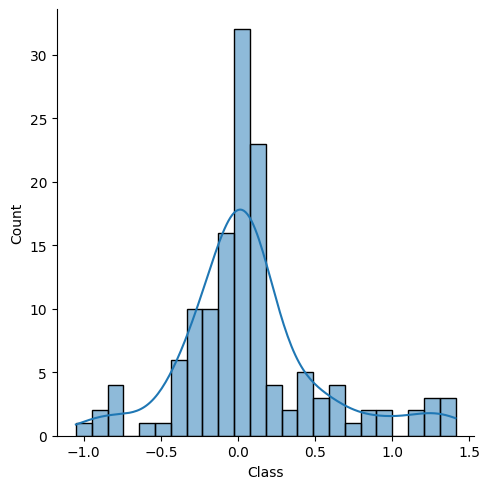

In [39]:
sns.displot(y_test - y_pred, kde=True)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [41]:
result1 = mean_absolute_error(y_test, y_pred)
result2 = mean_squared_error(y_test, y_pred)

In [42]:
result1, result2

(0.3030042270690372, 0.21255582501090922)